# Sprawozdanie z Laboratorium 3
## Autorzy: Mateusz Pawliczek, Piotr Świerzy  
## Data: 18.03.25

## Zadanie 1

Celem zadania jest analiza rozkładu punktów w przedziale [-1,1] poprzez wyznaczenie i wizualizację średniej geometrycznej odległości każdego punktu od pozostałych.
Analiza zostanie przeprowadzona dla trzech różnych rodzajów punktów:

- **Punkty Czebyszewa** – zerowe miejsca wielomianów Czebyszewa pierwszego rodzaju.
- **Punkty Legendre’a** – zerowe miejsca wielomianów Legendre’a.
- **Punkty równomiernie rozmieszczone** – podział przedziału **[-1,1]** na **n+1** równych części.

Wyniki zostaną przedstawione graficznie dla różnych wartości n = [10, 20, 50], co pozwoli na ocenę wpływu rozmieszczenia punktów na średnią geometryczną odległość.

## Realizacja

W realizacji zadania zostały stworzone funkcje obliczające wartości wezłów Chebysheva oraz równomiernie rozmieszczonych punktów.

In [47]:
import numpy as np

def chebyshev_nodes(n, a = -1, b = 1):
    return 0.5 * ((b - a) * (-np.cos((2 * np.arange(1, n + 1) - 1) / (2 * n) * np.pi)) + (b + a))

def uniform_nodes(n, a, b):
    return np.linspace(a, b, n)

Następnie dla każdego punktu został policzony jego średnia geometryczna odległość.

In [48]:
def geometric_mean_distance(points):
    n = len(points)
    distances = np.zeros(n)
    for i in range(n):
        dists = np.abs(points[i] - np.delete(points, i))
        distances[i] = np.exp(np.mean(np.log(dists)))
    return distances

Otrzymane wartości oraz odległości zostały ukazane na wykresach. Wykres przedstawia węzły Chebyshev'a, Legendre'a oraz metodą równomiernego rozmieszczenia.

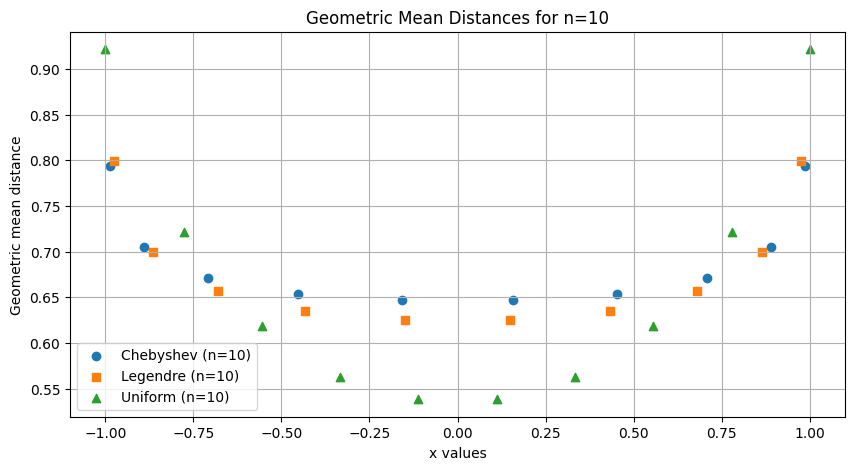

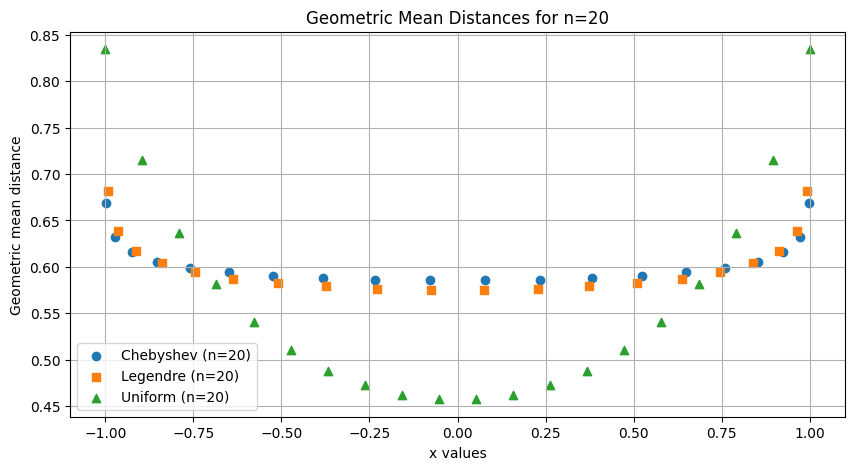

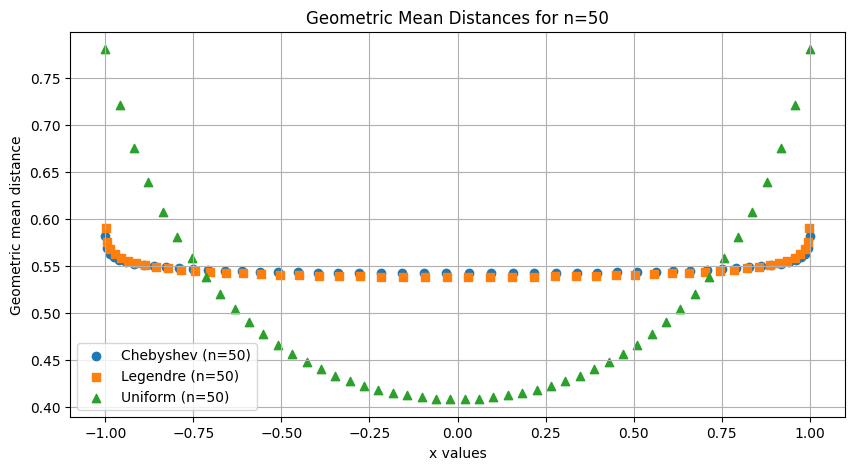

In [49]:
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import legroots

def plot_geometric_mean_distances():
    ns = [10, 20, 50]
    for n in ns:
        plt.figure(figsize=(10, 5))
        
        # Chebyshev nodes
        chebyshev_pts = chebyshev_nodes(n)
        chebyshev_dists = geometric_mean_distance(chebyshev_pts)
        plt.scatter(chebyshev_pts, chebyshev_dists, label=f'Chebyshev (n={n})', marker='o')
        
        # Legendre nodes
        legendre_pts = legroots(np.polynomial.legendre.Legendre.basis(n).coef)
        legendre_dists = geometric_mean_distance(legendre_pts)
        plt.scatter(legendre_pts, legendre_dists, label=f'Legendre (n={n})', marker='s')
        
        # Uniform nodes
        uniform_pts = uniform_nodes(n, 1, -1)
        uniform_dists = geometric_mean_distance(uniform_pts)
        plt.scatter(uniform_pts, uniform_dists, label=f'Uniform (n={n})', marker='^')
        
        plt.xlabel("x values")
        plt.ylabel("Geometric mean distance")
        plt.title(f"Geometric Mean Distances for n={n}")
        plt.legend()
        plt.grid()
        plt.show()

plot_geometric_mean_distances()

## Zadanie 2

Celem zadania było wyznaczenie wielomianów interpolacyjnych dla funkcji:

**F1**
```math
f_1(x) = \frac{1}{1 + 25x^2}, \quad x \in [-1, 1]
```
**F2**
```math
f_2(x) = e^{\cos(x)}, \quad x \in [0, 2\pi]
```

Zadanie miało być zrealizowane korzystając z:
- wielomianów Lagrange’a z równoodległymi węzłami 
- kubicznych funkcji sklejanych z równoodległymi węzłami 
- wielomianów Lagrange’a z węzłami Czebyszewa



## Realizacja a)

Do realizacji zadania skorzystano z poprzednio zaimplementowanych funkcji obliczających wartości węzłów.

Do realizacji tego zadania została zaimplementowana funkcja f1.

In [50]:
def f1(x):
    return 1 / (1 + 25 * x**2)

W celu wykonania interpolacji funkcji Randyego (F1) obrano zbiory punktów tworzone przez funkcje węzłów rozmieszczonych równomiernie oraz węzłów Chebyshev'a.

Dla każdego węzła policzono jego wartość dla funkcji f1, a następnie korzystając z otrzymanych wartości zostały stworzone wielomiany interpolacyjne Lagrange'a.

Została utworzona również funkcja sklejona ``CubicSpline``, która zapewnia gładką interpolację między punktami.

In [51]:
from scipy.interpolate import lagrange, CubicSpline

n = 12
x_unif = uniform_nodes(n, -1, 1)
x_cheb = chebyshev_nodes(n)
y_unif = f1(x_unif)
y_cheb = f1(x_cheb)

poly_unif = lagrange(x_unif, y_unif)
poly_cheb = lagrange(x_cheb, y_cheb)
spline = CubicSpline(x_unif, y_unif)

Dla uzyskania dokładniejszego porównania, próbki zostały obliczone na gęstych zbiorach punktów. Zbiór punktów do próbki został utworzony, zwiększając liczbę punktów o współczynnik 10 (czyli 10 razy gęstszy niż węzły interpolacyjne).

In [52]:
x_dense_unif = uniform_nodes(n * 10, -1, 1)
x_dense_cheb = chebyshev_nodes(n * 10)

Ostatecznie interpolowana funkcja została naniesiona na wykres:

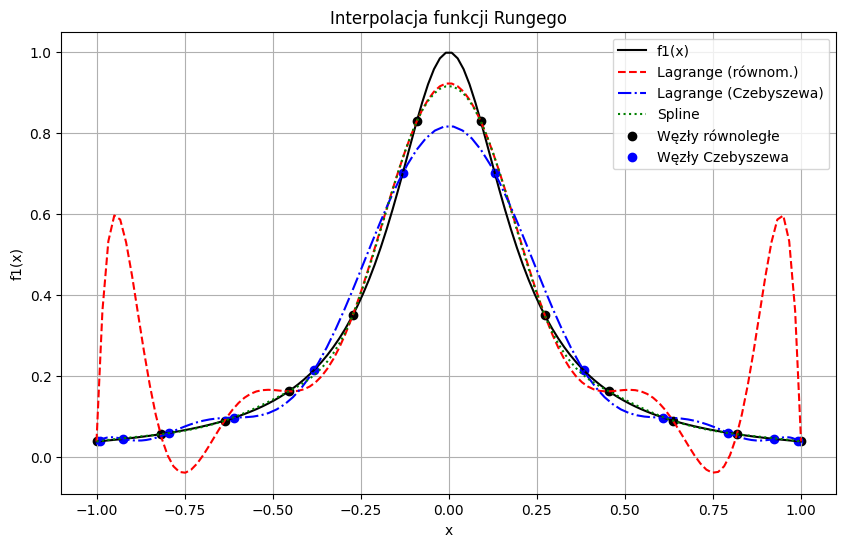

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(x_dense_unif, f1(x_dense_unif), 'k-', label='f1(x)')
plt.plot(x_dense_unif, poly_unif(x_dense_unif), 'r--', label='Lagrange (równom.)')
plt.plot(x_dense_cheb, poly_cheb(x_dense_cheb), 'b-.', label='Lagrange (Czebyszewa)')
plt.plot(x_dense_unif, spline(x_dense_unif), 'g:', label='Spline')
plt.scatter(x_unif, y_unif, color='black', marker='o', label='Węzły równoległe')
plt.scatter(x_cheb, y_cheb, color='blue', marker='o', label='Węzły Czebyszewa')

plt.xlabel('x')
plt.ylabel('f1(x)')
plt.title('Interpolacja funkcji Rungego')
plt.legend()
plt.grid()
plt.show()

## Realizacja b)

Celem podpunktu b) było wyznaczenie błędu interpolacji funkcji **f1** oraz **f2** przy użyciu trzech metod interpolacji: wielomianów Lagrange'a z równomiernymi węzłami, wielomianów Lagrange'a z węzłami Czebyszewa oraz funkcji sklejanych (Cubic Spline). Dla każdej z tych metod obliczono błąd interpolacji na zbiorze 500 losowo wybranych punktów i porównano wyniki w zależności od liczby węzłów interpolacyjnych.

Do realizacji zadania użyto tych funkcji:

In [54]:
def f1(x):
    return 1 / (1 + 25 * x**2)

def f2(x):
    return np.exp(np.cos(x))

W celu sprawdzenia błędu interpolacji zostały stworzone losowe zestawy punktów które zostaną użyte do testów.
Testy polegały na porównaniu wartości otrzymanych z metod interpolacji, a faktycznych wartości funkcji. Do obliczenmia tej różnicy została użyta funkcja ``np.linalg.norm``.

In [55]:
def compute_errors(f, a, b, n_values):
    np.random.seed(42)
    x_test = np.random.uniform(a, b, 500)
    y_test = f(x_test)
    
    errors_lagrange_unif = []
    errors_lagrange_cheb = []
    errors_spline = []
    
    for n in n_values:
        x_unif = uniform_nodes(n, a, b)
        x_cheb = chebyshev_nodes(n, a, b)
        y_unif = f(x_unif)
        y_cheb = f(x_cheb)
        
        poly_unif = lagrange(x_unif, y_unif)
        poly_cheb = lagrange(x_cheb, y_cheb)
        spline = CubicSpline(x_unif, y_unif)
        
        error_lagrange_unif = np.linalg.norm(poly_unif(x_test) - y_test)
        error_lagrange_cheb = np.linalg.norm(poly_cheb(x_test) - y_test)
        error_spline = np.linalg.norm(spline(x_test) - y_test)
        
        errors_lagrange_unif.append(error_lagrange_unif)
        errors_lagrange_cheb.append(error_lagrange_cheb)
        errors_spline.append(error_spline)
    
    return errors_lagrange_unif, errors_lagrange_cheb, errors_spline

Otrzymane błędy zostały naniesione na wykres:

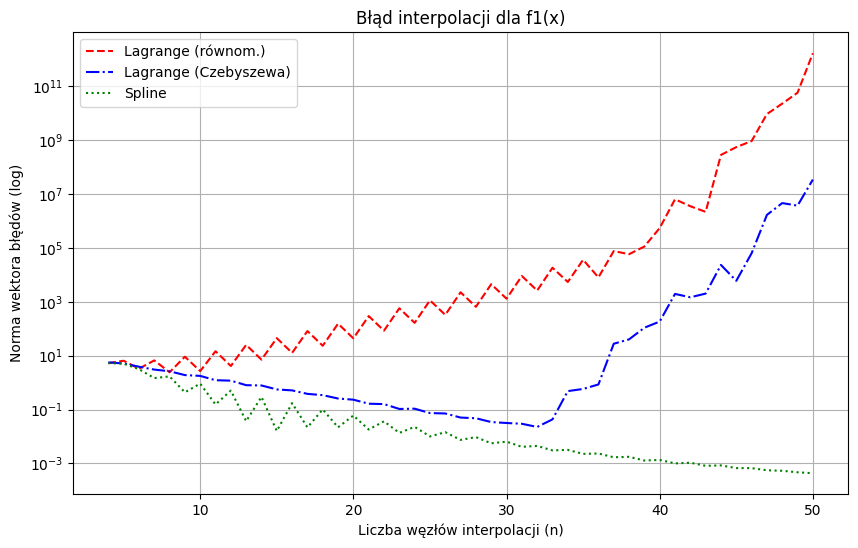

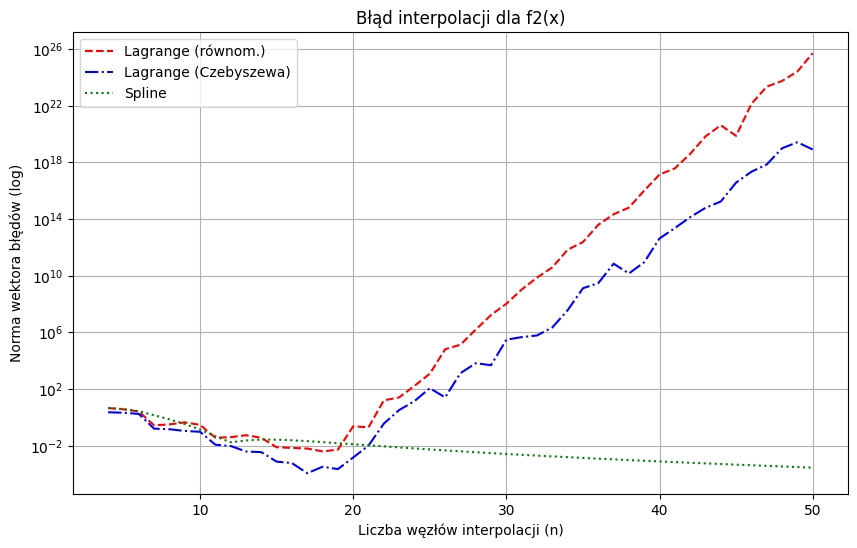

In [56]:
def plot_errors(f, a, b, title):
    n_values = np.arange(4, 51)
    errors_lagrange_unif, errors_lagrange_cheb, errors_spline = compute_errors(f, a, b, n_values)
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors_lagrange_unif, 'r--', label='Lagrange (równom.)')
    plt.plot(n_values, errors_lagrange_cheb, 'b-.', label='Lagrange (Czebyszewa)')
    plt.plot(n_values, errors_spline, 'g:', label='Spline')
    
    plt.xlabel('Liczba węzłów interpolacji (n)')
    plt.ylabel('Norma wektora błędów (log)')
    plt.yscale('log')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()


plot_errors(f1, -1, 1, 'Błąd interpolacji dla f1(x)')
plot_errors(f2, 0, 2*np.pi, 'Błąd interpolacji dla f2(x)')

### **Wnioski z wykresu błędów interpolacji dla \(f_1(x)\) i \( f_2(x) \)**

#### **1. Najmniej dokładna metoda: interpolacja wielomianowa Lagrange’a z równoodległymi węzłami**

- Błąd rośnie wykładniczo wraz ze wzrostem liczby węzłów \( n \).
- Występuje **efekt Rungego** – dla dużych \( n \) wielomian silnie oscyluje na końcach przedziału, co prowadzi do ogromnych błędów (ponad \( 10^{26} \)!).
- Metoda jest **niestabilna** dla dużych \( n \) i nie nadaje się do precyzyjnej interpolacji w tej postaci.

#### **2. Średnio dokładna metoda: interpolacja wielomianowa Lagrange’a z węzłami Czebyszewa**

- Działa lepiej niż węzły równoodległe – efekt Rungego jest mniejszy, ale nadal obecny.
- Błąd rośnie znacznie wolniej niż w przypadku węzłów równoodległych, ale dla dużych \( n \) także zaczyna gwałtownie rosnąć.
- Lepszy wybór niż węzły równoodległe, ale nadal nie jest to metoda idealna.

#### **3. Najbardziej dokładna metoda: interpolacja funkcją sklejaną (spline cubic)**

- Zachowuje stabilność i niski błąd nawet dla dużych \( n \).
- Brak efektu Rungego – błąd pozostaje niewielki, co świadczy o dobrze dopasowanej aproksymacji funkcji.
- **Najlepszy wybór do interpolacji**, ponieważ nie tylko zapewnia dokładność, ale również unika problemów z oscylacjami.

### **Podsumowanie:**

**Najbardziej dokładna metoda** to interpolacja **funkcją sklejaną (spline cubic)**, ponieważ jej błąd jest najmniejszy i nie rośnie dla dużych \( n \).  
**Najmniej dokładna metoda** to interpolacja wielomianowa Lagrange’a **z równoodległymi węzłami**, ponieważ powoduje ogromne błędy i efekt Rungego.
